## Avaliação de Carros

Neste notebook apresentamos um problema de classificação de carros. Usaremos algumas técnicas de machine learning e compararemos os resultados obtidos.

In [84]:
from sklearn import tree
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
import math
import pandas as pd
import numpy as np
#data = pd.read_csv('car numeric values.data')
newdata = pd.read_csv('car.data')

### Tratamento dos dados

Os atributos da base de dados são os descritos na lista abaixo chamada colunas. Nomearemos cada coluna do dataset de acordo com o nome de sua respectiva característica.

In [85]:
colunas = ['buying','maint','doors','persons','lug_boot','safety','class']
newdata.columns = colunas

Abaixo é apresentado algumas linhas do conjunto de dados.

In [87]:
newdata.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


A função info() nos mostra que o conjunto de dados possui 1727 instância onde cada atributo não possui valores nulos. Dessa maneira, não nos preocuparemos em tratar valores nulos neste conjunto.

In [90]:
newdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
buying      1727 non-null object
maint       1727 non-null object
doors       1727 non-null object
persons     1727 non-null object
lug_boot    1727 non-null object
safety      1727 non-null object
class       1727 non-null object
dtypes: object(7)
memory usage: 94.5+ KB


A função describe nos mostra quantas instância cada atributo possui, além de quantos valores únicos, o valor de atributo mais frequente e a quantidade que o atributo mais frequente aparece.

In [91]:
newdata.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1727,1727,1727,1727,1727,1727,1727
unique,4,4,4,3,3,3,4
top,med,med,3,more,med,med,unacc
freq,432,432,432,576,576,576,1209


Nossa base de dados não possui dados inconsistentes tampouco faltantes porém, possui muitos dados categóricos. Dessa maneira, temos que tornar esse dados categóricos em dados numéricos. A seguir mapeamos cada valor de atributo para um valor inteiro e substituimos no dataset.

In [92]:
mapa = {'vhigh':1,'high':2,'med':3,'low':4}
mapaClasses = {'unacc':0,'acc':1,'good':2,'vgood':3}
doors = {'2':2, '3':3, '4':4, '5more':5}
persons ={'2':2,'4':4,'more':5}
lug_boot = {'small':2,'med':3,'big':4}
safety = {'low':4, 'med':3, 'high':2}

In [93]:
newdata['buying'] =  newdata['buying'].map(mapa)
newdata['maint'] = newdata['maint'].map(mapa)
newdata['doors'] = newdata['doors'].map(doors)
newdata['persons'] = newdata['persons'].map(persons)
newdata['lug_boot'] = newdata['lug_boot'].map(lug_boot)
newdata['safety'] = newdata['safety'].map(safety)
newdata['class'] = newdata['class'].map(mapaClasses)

O resultado da transformação está mostrado abaixo.

In [95]:
newdata.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,1,1,2,2,2,3,0
1,1,1,2,2,2,2,0
2,1,1,2,2,3,4,0
3,1,1,2,2,3,3,0
4,1,1,2,2,3,2,0


#### Separamos 70% dos dados para treino e 30% para teste

In [64]:
indice = math.ceil(len(data)*0.7)
treino = newdata[:indice]
teste = newdata[indice:]
X = treino[colunas[:-1]]
Y = treino[colunas[-1]]

## Criação dos modelos 

### Árvore de Decisão

É um método de aprendizagem supervisionada não-paramétrica usado para classificação e regressão. O objetivo é criar um modelo que preveja o valor de uma variável de destino aprendendo regras de decisão simples inferidas dos recursos de dados. A seguir, usaremos esta técnica para classificar os carros.

In [96]:
classificador = tree.DecisionTreeClassifier()
classificador = classificador.fit(X,Y)

In [97]:
resultDecisionTree = model_selection.cross_val_score(classificador,X,Y,cv=3)
mediaDT = np.average(resultDecisionTree)
print(mediaDT)

0.820636115981


### Knn

KNN é um classificador onde o aprendizado é baseado na analogia. O conjunto de treinamento é formado por vetores n-dimensionais e cada elemento deste conjunto representa um ponto no espaço n-dimensional. Para  determinar  a  classe   de um elemento que não pertença ao conjunto de treinamento, o classificador KNN procura K elementos do conjunto de treinamento que estejam mais próximos deste elemento desconhecido, ou seja, que tenham a menor distância. Estes K elementos são chamados de K-vizinhos mais próximos. Verifica-se quais são as classes desses K vizinhos e a classe mais frequente será atribuída à classe do elemento desconhecido. 

In [99]:
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X,Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [100]:
resultKnn = model_selection.cross_val_score(neigh,X,Y,cv=3)
mediaKnn = np.average(resultKnn)
print(mediaKnn)

0.859384130433


### SVM - regressão

In [101]:
clf = svm.SVR()
clf.fit(X,Y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [102]:
resultSVM = model_selection.cross_val_score(clf,X,Y,cv=3)
mediaSVM = np.average(resultSVM)
print(mediaSVM)

0.586242955663


### Naive Bayes

O Classificador Naive Bayes ́e provavelmente o classificador mais utilizado em Machine Learning. O classificador ́e denominado ingênuo (“naive”) por assumir que os atributos sao condicionalmente independentes, ou seja, a informacao de um evento nao ́e informativa sobre nenhum outro. Apesar desta premissa “ingênua” e simplista, o classificador reporta o melhor desempenho em varias tarefas de classificacão. 

In [110]:
gnb = GaussianNB()
y_pred = gnb.fit(X,Y)

In [111]:
resultNB = model_selection.cross_val_score(gnb,X,Y,cv=3)
mediaNB = np.average(resultNB)
print(mediaNB)

0.856915055595


O gráfico abaixo, mostra o desempenho de cada técnica através da validação cruzada - <i>cross validation</i>.

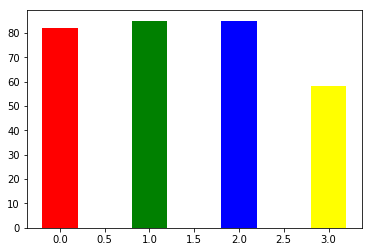

In [105]:
import matplotlib.pyplot as plt
y_axis = [int(mediaDT*100),int(mediaKnn*100),int(mediaNB*100), int(mediaSVM*100)]
x_axis = range(len(y_axis))
width_n = 0.4
bar_color = ['red','green','blue','yellow']
plt.bar(x_axis, y_axis, width=width_n, color=bar_color)
plt.show()

### Referências

https://www.maxwell.vrac.puc-rio.br/7587/7587_6.PDF <br>
https://www.maxwell.vrac.puc-rio.br/9947/9947_5.PDF <br>
http://scikit-learn.org/stable/